#Weekly Assignment 2

In [4]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import math
from random import uniform

In [5]:
#Read data
data = pd.read_csv("diet_and_atp.tsv", header=[0], sep="\t")

In [6]:
iterations = 1000000
p_stand = 0.5
c_stand = 0.5 #Stablish starting points for each of the coefficients
f_stand = 0.5
all_my_standings = []

for i in range(iterations):
    p_step = uniform(-data["Protein"].var()/2,data["Protein"].var()/2)
    c_step = uniform(-data["Carbohydrates"].var()/2,data["Carbohydrates"].var()/2) #The steps are balanced for each variable, so that they aren't too big or too small
    f_step = uniform(-data["Fat"].var()/2,data["Fat"].var()/2)
    p_candidate = p_stand + p_step
    c_candidate = c_stand + c_step
    f_candidate = f_stand + f_step
    
    error_stand = sum((p_stand*data["Protein"] + c_stand*data["Carbohydrates"] + f_stand*data["Fat"] - data["ATP"])**2)
    error_move = sum((p_candidate*data["Protein"] + c_candidate*data["Carbohydrates"] + f_candidate*data["Fat"] - data["ATP"])**2)
    if error_stand > error_move: #Move only if error decreases
        p_stand = p_candidate
        c_stand = c_candidate
        f_stand = f_candidate
    else:                        #Otherwise, move randomly, depeding on how big is the new error with respect to the previous one
        random_number = uniform(0,1)
        if random_number <= error_stand/error_move:
            p_stand = p_candidate
            c_stand = c_candidate
            f_stand = f_candidate

    all_my_standings.append((p_stand,c_stand,f_stand)) #Record the position for each variable

In [11]:
proteins = [cosa[0] for cosa in all_my_standings]
carbohydrates = [cosa[1] for cosa in all_my_standings] #Separate each coefficiente variables
fats = [cosa[2] for cosa in all_my_standings]
bins = 80

0.22074148584612766


Text(0, 0.5, 'frequency')

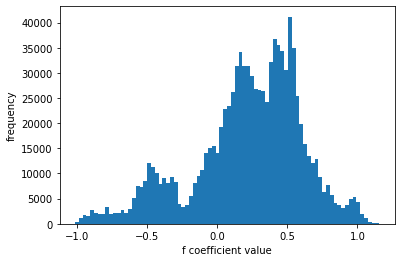

In [12]:
print(sum(fats)/len(fats))
plt.hist(fats,bins)
plt.xlabel("f coefficient value")
plt.ylabel("frequency")

1.1939650016004373


Text(0, 0.5, 'frequency')

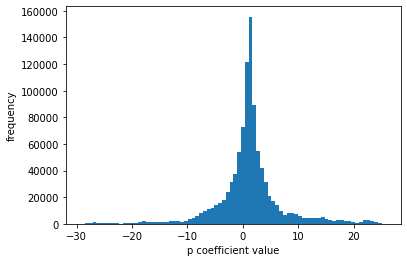

In [13]:
print(sum(proteins)/len(proteins))
plt.hist(proteins,bins)
plt.xlabel("p coefficient value")
plt.ylabel("frequency")

0.8705452323043181


Text(0, 0.5, 'frequency')

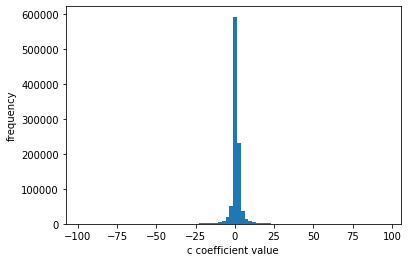

In [14]:
print(sum(carbohydrates)/len(carbohydrates))
plt.hist(carbohydrates,bins)
plt.xlabel("c coefficient value")
plt.ylabel("frequency")

In [15]:
p = sum(proteins)/len(proteins)
c = sum(carbohydrates)/len(carbohydrates)
f = sum(fats)/len(fats)
error = sum((p*data["Protein"]+c*data["Carbohydrates"]+f*data["Fat"] - data["ATP"])**2)
print(error)

95.11495278580279
